In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import time
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import csv

from os import listdir
from os.path import isfile, join

In [ ]:
train_data_list = []
with open('drive/My Drive/korat_sauce/img_csv.csv') as f_img:
    img_bins = csv.reader(f_img)
    for im in img_bins:
        train_data_list.append(im)
    f_img.close()

# r_bins =  np.array(train_data_list[0][1:33]).astype(np.float)
# g_bins = np.array(train_data_list[0][33:65]).astype(np.float)
# b_bins = np.array(train_data_list[0][65:97]).astype(np.float)




In [ ]:
r_bins = []
g_bins = []
b_bins = []
target = []
data_for_train = []
for i in range(len(train_data_list)):
    img_data = np.array(train_data_list[i]).astype(np.float)
    min_x =  min(img_data) 
    max_x = max(img_data)
    for j in range(1,len(img_data)):
        img_data[j] = (img_data[j]-min_x)/(max_x-min_x) #normalization
    data_for_train.append(img_data)
    r_bins.append(img_data[1:33])
    g_bins.append(img_data[33:65])
    b_bins.append(img_data[65:97])
    target.append(img_data[0])


bins_order = np.arange(32).astype(np.float)
for i in range(len(bins_order)):
    bins_order[i]  = (bins_order[i]-1)/31

In [ ]:
print(r_bins)


In [ ]:
# weight_for_separate_bins = []
# for i in range(32):
#     weight_for_separate_bins.append(np.random.rand(6)+np.array([0.01,0.01,0.01,0.1,0.1,0.1]))


weight_for_separate_bins = []
for i in range(32):
    weight_for_separate_bins.append([np.random.rand(2)+np.array([0.1,0.1]) #เส้นบน
    ,np.random.rand(2)+np.array([0.1,0.1]) #เส้นกลาง
    ,np.random.rand(2)+np.array([0.1,0.1]) ]) #เส้นล่าง
weight_for_separate_bins

In [ ]:
weight_for_sum_weight_separate_bin = []
for i in range(32):
    weight_for_sum_weight_separate_bin.append([np.random.rand(3)+np.array([0.1,0.1,0.1]) #โหนด 1
    ,np.random.rand(3)+np.array([0.1,0.1,0.1]) #โหนด 2
    ,np.random.rand(3)+np.array([0.1,0.1,0.1]) #โหนด 3
    ,np.random.rand(3)+np.array([0.1,0.1,0.1]) #โหนด 4
     ]) 
    

In [ ]:
weight_for_sum_weight_separate_bin

In [ ]:
weight_for_identify_color_chanel = []
for i in range(128*4):
    weight_for_identify_color_chanel.append(np.random.rand()+0.01)

In [ ]:
weight_for_identify_type = []
for i in range(4*4):
    weight_for_identify_type.append(np.random.rand()+0.01)

In [ ]:
bias_for_separate_bins = np.ones(32).astype(np.float)
bias_for_sum_weight_of_separate_bins = np.ones(32).astype(np.float)
bias_for_identify_color_chanel = np.ones(128).astype(np.float)
bias_for_identify_type = np.ones(4).astype(np.float)

In [ ]:
def perceptron_for_separate_bins(input_data,weight,bias):
    #print(np.dot(weight,np.transpose(input_data))+bias)
    return np.dot(input_data,np.transpose(weight))+bias

In [ ]:
def transfer_function_for_separate_bins_line1(result_of_summation): # เส้นที่ 1
    print("result_of_summation = ",result_of_summation)
    if(result_of_summation>=0.8):
        return 1
    else:
        return 0

In [ ]:
def train_weight_for_seperate_bins_line1(input_data,weight,bias,target,result):
    while(result != target):
        error = target-result
        weight = weight+np.dot(error,input_data)*0.1
        bias = bias+error*0.1
        result = transfer_function_for_separate_bins_line1(np.dot(weight,np.transpose(input_data))+bias)
        print("in train mode : error = ",error,"weight = ",weight," bias = ",bias," result = ",result)
    return weight,bias,result

In [ ]:
def transfer_function_for_separate_bins_line2(result_of_summation):# เส้นที่ 2
    print("result_of_summation = ",result_of_summation)
    if(result_of_summation>=0.5):
        return 1
    else:
        return 0

In [ ]:
def train_weight_for_seperate_bins_line2(input_data,weight,bias,target,result): 
    while(result != target):
        error = target-result
        weight = weight+np.dot(error,input_data)*0.1
        bias = bias+error*0.1
        result = transfer_function_for_separate_bins_line1(np.dot(weight,np.transpose(input_data))+bias)
        print("in train mode : error = ",error,"weight = ",weight," bias = ",bias," result = ",result)
    return weight,bias,result

In [ ]:
def transfer_function_for_separate_bins_line3(result_of_summation): # เส้นที่ 3
    print("result_of_summation = ",result_of_summation)
    if(result_of_summation>=0.3):
        return 1
    else:
        return 0

In [ ]:
def train_function_for_separate_bins_line3(result_of_summation):
    while(result != target):
        error = target-result
        weight = weight+np.dot(error,input_data)*0.1
        bias = bias+error*0.1
        result = transfer_function_for_separate_bins_line1(np.dot(weight,np.transpose(input_data))+bias)
        print("in train mode : error = ",error,"weight = ",weight," bias = ",bias," result = ",result)
    return weight,bias,result

In [ ]:
def transfer_function_for_sum_weight_separate_bin(result_of_summation): #รับค่า จาก การแยกเส้นใน bin
    # print("result_of_summation = ",result_of_summation)
    for i in range(len(result_of_summation)):
        if(result_of_summation[i]>=2):#?1
            result_of_summation[i] = 1
        else:
            result_of_summation[i] = 0
    return result_of_summation

In [ ]:
def train_function_for_sum_weight_separate_bin(result_of_summation):
    pass

In [ ]:
def perceptron_identify_color_chanel(input_data,weight,bias):
    #print(np.dot(weight,np.transpose(input_data))+bias)
    return transfer_function_identify_color_chanel(np.dot(weight,np.transpose(input_data))+bias)

In [ ]:
def transfer_function_identify_color_chanel(result_of_summation):
    pass

In [ ]:
def train_weight_for_identify_color_chanel(input_data,weight,bias,target,result):
    pass

In [ ]:
def perceptron_identify_type(input_data,weight,bias):
    #print(np.dot(weight,np.transpose(input_data))+bias)
    return transfer_function_identify_type(np.dot(weight,np.transpose(input_data))+bias)

In [ ]:
def transfer_function_identify_type(result_of_summation):


In [ ]:
def train_weight_for_identify_type(input_data,weight,bias,target,result):
    pass

In [ ]:
#test for r_bin
def train_until_weight_suit_for_classify(input_data,bins_order,weight_for_separate_bins,weight_for_sum_weight_separate_bin,bias_for_separate_bins,bias_for_sum_weight_of_separate_bins,target):
    round_for_train = 0
    check_true = 0

    while (check_true <32 and round_for_train<200):
        round_for_train+=1
        check_true = 0

        #นำ แต่ละ ช่วงbins กับความสูงของbins (เป็น x y) เข้าสู่ โหนดเส้นสูง
        #นำ แต่ละ ช่วงbins กับความสูงของbins (เป็น x y) เข้าสู่ โหนดเส้นกลาง
        #นำ แต่ละ ช่วงbins กับความสูงของbins (เป็น x y) เข้าสู่ โหนดเส้นต่ำ
        #นำ ค่า ที่ออกมาจากทั้ง 3 เส้น เข้า 4 โหนดเพื่อแยกชนิด(4 โหนดนี้เป็นตัวเฉลย)
        #เช็ค ผลลัพธ์ จากนั้นทำการ ฝึกกลับ(เมื่อผลลัพธ์ผิด) โดยเริ่มฝึกที่ส่วนของ ฟังก์ชัน 4 โหนด
        #ปรับ weight ของทาง จากเส้น สูง กลาง ต่ำ ต่อ

        #######
        #จัดการทีละจุด
        for i in range(len(input_data)):
            for j in range(len(input_data[0])):
                result_from_line1 = transfer_function_for_separate_bins_line1(perceptron_for_separate_bins(np.array([bins_order[j],input_data[i][j]]),weight_for_separate_bins[i][0],bias_for_separate_bins[i]))
                result_from_line2 = transfer_function_for_separate_bins_line2(perceptron_for_separate_bins(np.array([bins_order[j],input_data[i][j]]),weight_for_separate_bins[i][1],bias_for_separate_bins[i]))
                result_from_line3 = transfer_function_for_separate_bins_line3(perceptron_for_separate_bins(np.array([bins_order[j],input_data[i][j]]),weight_for_separate_bins[i][2],bias_for_separate_bins[i]))
                
                result_from_sum_weight = transfer_function_for_sum_weight_separate_bin(perceptron_for_separate_bins(np.array([result_from_line1,result_from_line2,result_from_line3]),weight_for_sum_weight_separate_bin[j],bias_for_sum_weight_of_separate_bins[j]))
                print(result_from_sum_weight)
                print("**************")

                #ต่อไปปรับ weight
                #ใช้ target (4 ชนิด)เช็ค จากนั้น ปรับ weight ของช่วง 3 ถึง 4
                #จากนั้นก็ปรับ weight ของช่วง input เข้ามาแบ่ง 3 เส้น
                
            break
        break

    print("Now,Weight are OK! and use round for train = ",round_for_train)
    #return weight,bias

In [ ]:
# weight,bias = train_until_weight_suit_for_classify(input_data,bins_order,weight_for_separate_bins,weight_for_sum_weight_separate_bin,bias,target)
out = train_until_weight_suit_for_classify(r_bins,bins_order,weight_for_separate_bins,weight_for_sum_weight_separate_bin,bias_for_separate_bins,bias_for_sum_weight_of_separate_bins,target)

result_of_summation =  0.9966983344518613
result_of_summation =  0.9915513962672523
result_of_summation =  0.981506642673647
[1. 0. 1. 1.]
**************
result_of_summation =  1.0055149055069987
result_of_summation =  1.0031605704143336
result_of_summation =  1.004589338086743
[1. 1. 1. 1.]
**************
result_of_summation =  1.0412494677272486
result_of_summation =  1.0301963382504236
result_of_summation =  1.0500723741613225
[1. 1. 1. 1.]
**************
result_of_summation =  1.0861755391258294
result_of_summation =  1.062499723443736
result_of_summation =  1.1032043070471402
[1. 1. 1. 1.]
**************
result_of_summation =  1.1140316649075097
result_of_summation =  1.0850203906879212
result_of_summation =  1.142131145854944
[1. 0. 1. 1.]
**************
result_of_summation =  1.2641348627609936
result_of_summation =  1.1776003687831658
result_of_summation =  1.2827883122522166
[1. 1. 1. 1.]
**************
result_of_summation =  1.3987438022852905
result_of_summation =  1.2613006

In [ ]:
target[19]

2.0

In [ ]:
for i in range(len(r_bins)):
  print("target = ",target[i]," val = ",r_bins[i][19])

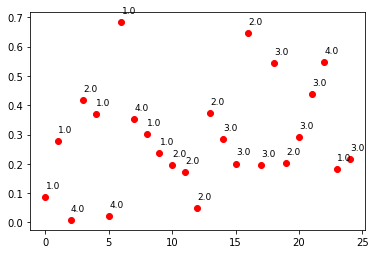

In [ ]:
r_bins19 = []
for i in range(25):
    r_bins19.append(r_bins[i][19])
r_bins19 = np.array(r_bins19)
plt.plot(np.arange(25),r_bins19,"or")
for i in range(25):
    plt.text(i+.03, r_bins19[i]+.03, target[i], fontsize=9)

plt.show()

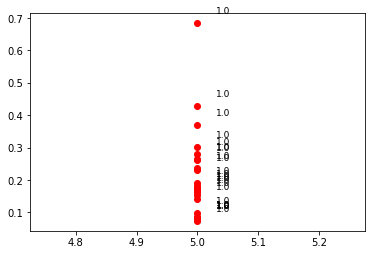

In [ ]:

for i in range(100):
    if(target[i]==1):
      plt.plot(5,r_bins[i][19],"or")
      plt.text(5+.03, r_bins[i][19]+.03, target[i], fontsize=9)

plt.show()

1.0
1.0
4.0
2.0
1.0
4.0
1.0
4.0
1.0
1.0
2.0
2.0
2.0
2.0
3.0
3.0
2.0
3.0
3.0
2.0


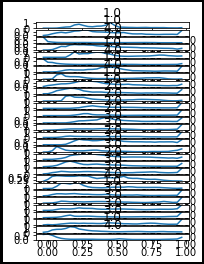

In [ ]:
fig = plt.figure(edgecolor=(0,0,0),linewidth=5)

for i in range(30):
  ax1 = fig.add_subplot(30,2,i*2+1)
  ax1.set_title(target[i])
  ax1.plot(bins_order,b_bins[i])


for i in range(20):
    print(target[i])
plt.savefig('graph.png', dpi = 300);

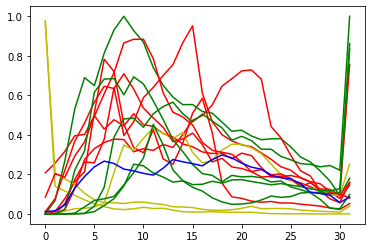

In [ ]:
for i in range(15):
  if(target[i]==1):
      plt.plot(np.arange(32),r_bins[i],'r')
  elif(target[i]==2):
      plt.plot(np.arange(32),r_bins[i],'g')
  elif(target[i]==3):
      plt.plot(np.arange(32),r_bins[i],'b')
  elif(target[i]==4):
      plt.plot(np.arange(32),r_bins[i],'y')
plt.show()

In [ ]:
0 1 2 3 4 5
1 3 5 7 9 11